In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from uncertainties import ufloat
import uncertainties.unumpy as unp 

In [2]:
def f(I_max, I_min):
    return (I_max-I_min)/(I_max + I_min)

In [3]:
f(2.75, 0.25)

0.8333333333333334

In [4]:
f(2.84,0.08)

0.9452054794520548

In [5]:
df = pd.read_csv('kontrast.csv')
df

I_err = 0.01

phi = df["phi"].to_numpy()
phi_rad = np.deg2rad(phi)
I_min = unp.uarray( df["I_min"].to_numpy(), I_err)
I_max = unp.uarray( df["I_max"].to_numpy(), I_err)



In [6]:
df

,phi,I_min,I_max
0,0,0.80,0.99
1,15,0.48,0.82
2,30,0.13,0.77
3,45,0.10,0.74
4,50,0.06,0.84
5,55,0.04,0.91
6,60,0.05,0.97
7,65,0.09,1.07
8,80,0.43,1.20
9,95,0.92,1.22


In [7]:
K = f(I_max, I_min)
print(K)

[0.10614525139664802+/-0.007945017254390563
 0.26153846153846155+/-0.011244471971805638
 0.7111111111111111+/-0.019281405437387298
 0.761904761904762+/-0.02116570827958557
 0.8666666666666668+/-0.02079358347795289
 0.9157894736842105+/-0.020185677487957233
 0.9019607843137254+/-0.018671430313860943
 0.8448275862068966+/-0.015959845060102396
 0.47239263803680986+/-0.009595510968178823
 0.14018691588785043+/-0.00667309474885634
 0.5662650602409638+/-0.006526953589361686
 0.8688524590163933+/-0.00614245401866666
 0.9047619047619048+/-0.006054417050491545
 0.9047619047619047+/-0.006486875411240942
 0.9075907590759075+/-0.006303061826969608
 0.8345323741007195+/-0.0066258256259081666
 0.5882352941176471+/-0.006032147785891588
 0.3275862068965517+/-0.006414490376646874
 0.10989010989010986+/-0.00781718046127801]


In [8]:
def f_sin(x, A):
    return A* np.abs(np.sin(x)*np.cos(x))

In [9]:
param, cov = curve_fit(f_sin, phi_rad, unp.nominal_values(K), sigma=unp.std_devs(K), absolute_sigma=True)
uncertainties = np.sqrt(np.diag(cov))
print(param)
print(uncertainties)

[1.82323088]
[0.0050143]


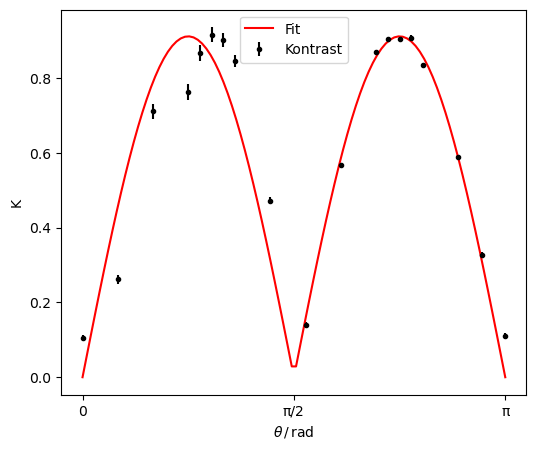

In [10]:
phi_lin = np.linspace(phi_rad.min(), phi_rad.max(), 100)
plt.figure(figsize=(6,5))

plt.errorbar(phi_rad, unp.nominal_values(K), yerr=unp.std_devs(K),  fmt='k.', label='Kontrast')
plt.plot(phi_lin, f_sin(phi_lin, *param), 'r-', label='Fit')

range_ = np.arange(0, np.pi+np.pi/2, step=(np.pi / 2))
plt.xticks(range_, ['0', 'π/2', 'π'])

plt.xlabel(r"$\theta \, / \, \mathrm{rad}$")
plt.ylabel('K')
plt.legend()
plt.savefig("kontrast.png")
plt.show()


In [11]:
lambda_0 = 632.990 *10**(-6) #mm
theta = 10*(2*np.pi/360) #rad
D = 1 #mm

def n(M):
    return 1/(1 -  (M*lambda_0)/(2*D*theta*theta)  )


In [12]:
M = np.array([32, 35, 33, 37, 32, 38, 29, 36, 34, 34])
M_err = unp.uarray(M, 1)

print(n(M))
print(n(M_err))

print(np.mean(n(M)))
print(np.mean(n(M_err)))

[1.49807656 1.57145515 1.52176263 1.62450261 1.49807656 1.65239243
 1.43124504 1.59753863 1.54620974 1.54620974]
[1.4980765625123769+/-0.02331740076989133
 1.5714551545289521+/-0.02565760423333317
 1.521762634447546+/-0.02406057215615726
 1.62450260523213+/-0.027419084031725622
 1.4980765625123769+/-0.02331740076989133
 1.6523924261784622+/-0.028368639576670587
 1.4312450367602714+/-0.02128335581002205
 1.5975386312543645+/-0.026516417974880663
 1.5462097395110534+/-0.02483984761905253
 1.5462097395110534+/-0.02483984761905253]
1.5487469092448585
1.549+/-0.008


In [13]:
df2 = pd.read_csv('index.csv')
n_err = 1

p = df2["p"].to_numpy()
m_1 = unp.uarray( df2["n_1"].to_numpy(), n_err)
m_2 = unp.uarray( df2["n_2"].to_numpy(), n_err)
m_3 = unp.uarray( df2["n_3"].to_numpy(), n_err)

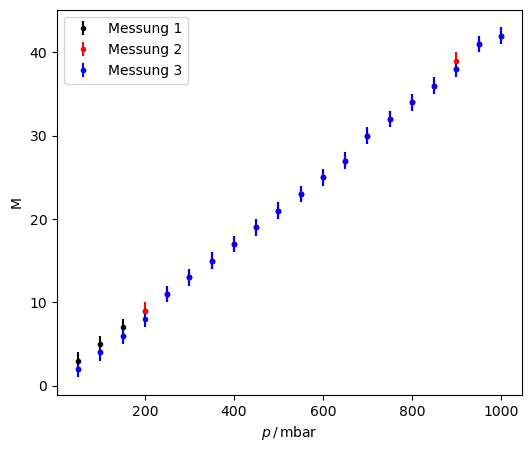

In [14]:
plt.figure(figsize=(6,5))

plt.errorbar(p, unp.nominal_values(m_1), yerr=unp.std_devs(m_1),  fmt='k.', label='Messung 1')
plt.errorbar(p, unp.nominal_values(m_2), yerr=unp.std_devs(m_2),  fmt='r.', label='Messung 2')
plt.errorbar(p, unp.nominal_values(m_3), yerr=unp.std_devs(m_3),  fmt='b.', label='Messung 3')

plt.xlabel(r"$p \, / \, \mathrm{mbar}$")
plt.ylabel('M')
plt.legend()
plt.show()

In [15]:
L = ufloat(100, 0.1)

def n_gas(M):
    return ((lambda_0 * M)/L) + 1

n_1 = n_gas(m_1)
n_2 = n_gas(m_2)
n_3 = n_gas(m_3)

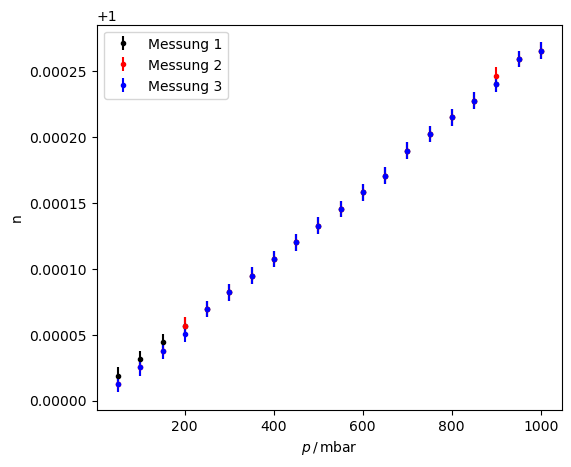

In [16]:
plt.figure(figsize=(6,5))

plt.errorbar(p, unp.nominal_values(n_1), yerr=unp.std_devs(n_1),  fmt='k.', label='Messung 1')
plt.errorbar(p, unp.nominal_values(n_2), yerr=unp.std_devs(n_2),  fmt='r.', label='Messung 2')
plt.errorbar(p, unp.nominal_values(n_3), yerr=unp.std_devs(n_3),  fmt='b.', label='Messung 3')

plt.xlabel(r"$p \, / \, \mathrm{mbar}$")
plt.ylabel('n')
plt.legend()
plt.show()

In [53]:
T_1 = 19.9 + 273.15 #Kelvin
T_0 = 15 + 273.15 #Kelvin
p_0 = 1013
R = 8.314 #J/mol K
p = df2["p"].to_numpy() #mbar

In [54]:
df2["N_1"] = n_1
df2["N_2"] = n_2
df2["N_3"] = n_3

df2["n_1"] = m_1
df2["n_2"] = m_2
df2["n_3"] = m_3

df2 = df2[['p', 'n_1', 'N_1', 'n_2', 'N_2', 'n_3', 'N_3']]
df2

,p,n_1,N_1,n_2,N_2,n_3,N_3
0,50,3.0+/-1.0,1.000019+/-0.000006,2.0+/-1.0,1.000013+/-0.000006,2.0+/-1.0,1.000013+/-0.000006
1,100,5.0+/-1.0,1.000032+/-0.000006,4.0+/-1.0,1.000025+/-0.000006,4.0+/-1.0,1.000025+/-0.000006
2,150,7.0+/-1.0,1.000044+/-0.000006,6.0+/-1.0,1.000038+/-0.000006,6.0+/-1.0,1.000038+/-0.000006
3,200,9.0+/-1.0,1.000057+/-0.000006,9.0+/-1.0,1.000057+/-0.000006,8.0+/-1.0,1.000051+/-0.000006
4,250,11.0+/-1.0,1.000070+/-0.000006,11.0+/-1.0,1.000070+/-0.000006,11.0+/-1.0,1.000070+/-0.000006
5,300,13.0+/-1.0,1.000082+/-0.000006,13.0+/-1.0,1.000082+/-0.000006,13.0+/-1.0,1.000082+/-0.000006
6,350,15.0+/-1.0,1.000095+/-0.000006,15.0+/-1.0,1.000095+/-0.000006,15.0+/-1.0,1.000095+/-0.000006
7,400,17.0+/-1.0,1.000108+/-0.000006,17.0+/-1.0,1.000108+/-0.000006,17.0+/-1.0,1.000108+/-0.000006
8,450,19.0+/-1.0,1.000120+/-0.000006,19.0+/-1.0,1.000120+/-0.000006,19.0+/-1.0,1.000120+/-0.000006
9,500,21.0+/-1.0,1.000133+/-0.000006,21.0+/-1.0,1.000133+/-0.000006,21.0+/-1.0,1.000133+/-0.000006


In [55]:
def n_luft(p,a,b):
    return (a * p)/(R * T_1) + b

In [61]:
param1, cov1 = curve_fit(n_luft, p, unp.nominal_values(n_1), sigma=unp.std_devs(n_1), absolute_sigma=True)
uncertainties1 = np.sqrt(np.diag(cov1))
a1 = ufloat(param1[0], uncertainties1[0])
b1 = ufloat(param1[1], uncertainties1[1])
print(a1)
print(b1)

param2, cov2 = curve_fit(n_luft, p, unp.nominal_values(n_2), sigma=unp.std_devs(n_2), absolute_sigma=True)
uncertainties2 = np.sqrt(np.diag(cov2))
a2 = ufloat(param2[0], uncertainties2[0])
b2 = ufloat(param2[1], uncertainties2[1])
print(a2)
print(b2)

param3, cov3 = curve_fit(n_luft, p, unp.nominal_values(n_3), sigma=unp.std_devs(n_3), absolute_sigma=True)
uncertainties3 = np.sqrt(np.diag(cov3))
a3 = ufloat(param3[0], uncertainties3[0])
b3 = ufloat(param3[1], uncertainties3[1])
print(a3)
print(b3)

0.000642+/-0.000012
1.0000035+/-0.0000029
0.000657+/-0.000012
0.9999995+/-0.0000029
0.000657+/-0.000012
0.9999990+/-0.0000029


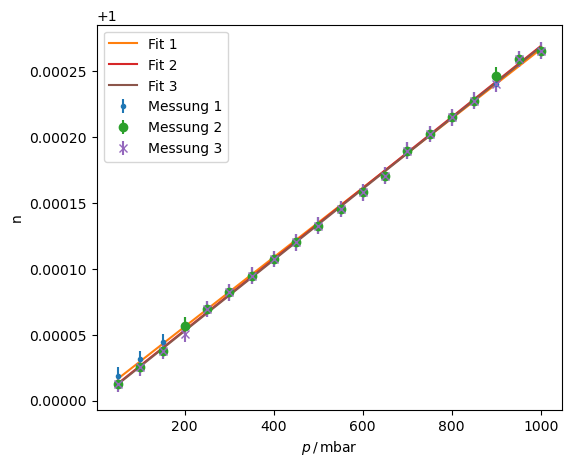

In [70]:
p_lin = np.linspace(p.min(), p.max(), 100)
plt.figure(figsize=(6,5))

plt.errorbar(p, unp.nominal_values(n_1), yerr=unp.std_devs(n_1),  fmt='.', label='Messung 1')
plt.plot(p_lin, n_luft(p_lin, *param1), '-', label='Fit 1')
plt.errorbar(p, unp.nominal_values(n_2), yerr=unp.std_devs(n_2),fmt='o', label='Messung 2')
plt.plot(p_lin, n_luft(p_lin, *param2),'-', label='Fit 2')
plt.errorbar(p, unp.nominal_values(n_3), yerr=unp.std_devs(n_3),fmt='x', label='Messung 3')
plt.plot(p_lin, n_luft(p_lin, *param3),'-',  label='Fit 3')

plt.xlabel(r"$p \, / \, \mathrm{mbar}$")
plt.ylabel('n')
plt.legend()
plt.savefig("index.png")
plt.show()

In [58]:
def lor(a):
    return (a * p_0)/(T_0 * R) + 1

In [60]:
print(lor(a1))
print(lor(a2))
print(lor(a3))

print((lor(a1) + lor(a2) + lor(a3))/3)

1.000271+/-0.000005
1.000278+/-0.000005
1.000278+/-0.000005
1.0002757+/-0.0000029
